# Import Library

In [ ]:
import pandas as pd  # Import pandas for data manipulation and analysis
import numpy as np  # Import NumPy for numerical operations

from sklearn.preprocessing import LabelEncoder  # Import Label Encoder for converting categorical labels to numeric

from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn.svm import SVC  # Importing the Support Vector Machine (SVM) classifier from scikit-learn
from sklearn.model_selection import GridSearchCV  # Importing the GridSearchCV module for hyperparameter tuning

from sklearn.metrics import accuracy_score # Import accuracy_score for accuracy calculation
import matplotlib.pyplot as plt  # Import matplotlib for data visualization
import seaborn as sns  # Import seaborn for statistical data visualization
from sklearn.metrics import confusion_matrix  # Import confusion_matrix for evaluating classification performance
from sklearn.metrics import classification_report  # Import classification_report for detailed classification metrics

# Load Data

In [ ]:
# Load dataset
df = pd.read_csv("productOnline.csv")
df.sample(5)

,brand,product name,class,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,OS,warranty
175,Asus,Vivobook Pro 15 OLED M6500QC-LK541WS Laptop,C,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",16GB,DDR4,512GB,SSD,4GB NVIDIA GeForce RTX 3050 GPU,15.6,Windows 11 OS,2
54,Acer,TravelMate P2 TMP214-53 Business Laptop,B,11th Gen Intel Core i7 1165G7,"Quad Core, 8 Threads",16GB,DDR4,1TB,SSD,Intel Integrated Iris Xe,14.0,Windows 11 OS,1
807,Samsung,Galaxy Book2 15 Laptop,C,12th Gen Intel Core i7 1255U,"10 Cores (2P + 8E), 12 Threads",16GB,LPDDR4,512GB,SSD,Intel Iris Xe Graphics,15.6,Windows 11 OS,1
389,HP,14s-dq2649TU Laptop,A,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Integrated UHD,14.0,Windows 11 OS,1
526,HP,ZBook Firefly 16 G9 6V2X7PA Workstation PC Laptop,D,12th Gen Intel Core i7 1255U,"10 Cores (2P + 8E), 12 Threads",16GB,DDR5,1TB,SSD,Intel Iris Xe Graphics,16.0,Windows 11 OS,2


# Preprocessing

In [ ]:
# Show dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         848 non-null    object 
 1   product name  848 non-null    object 
 2   class         848 non-null    object 
 3   processor     848 non-null    object 
 4   CPU           848 non-null    object 
 5   Ram           848 non-null    object 
 6   Ram_type      848 non-null    object 
 7   ROM           848 non-null    object 
 8   ROM_type      848 non-null    object 
 9   GPU           848 non-null    object 
 10  display_size  848 non-null    float64
 11  OS            848 non-null    object 
 12  warranty      848 non-null    int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 86.2+ KB


In [ ]:
# Assume feature and class name
feature_names = df.drop(labels=['class'], axis=1).columns.tolist()
class_names = df['class'].unique().tolist()

# Print the list of feature names
print("Feature Names:")
print(feature_names)

# Print the list of class names
print("\nClass Names:")
print(class_names)

Feature Names:
['brand', 'product name', 'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU', 'display_size', 'OS', 'warranty']

Class Names:
['A', 'B', 'C', 'D']


In [ ]:
# Lower cases data and count possible instances

# Function to lower cases data
def lower_cases_data(df) :
  for i in df.columns :
    if  df.loc[:,i].dtype == 'O':
      df.loc[:,i] = df.loc[:,i].str.lower()

# Function to count possible instances
def count_possible_instances(df) :
  for i in df.columns :
    print(i, ":", df.loc[:,i].value_counts())
    print("-------------------------------------")

# Call lower_cases_data function and count_possible_instances function
lower_cases_data(df)
count_possible_instances(df)

brand : brand
hp           175
lenovo       165
asus         153
dell          98
acer          84
msi           59
samsung       26
infinix       15
apple          9
xiaomi         8
lg             8
gigabyte       8
fujitsu        6
zebronics      4
ultimus        4
tecno          3
wings          3
realme         3
chuwi          3
honor          2
axl            2
microsoft      2
huawei         2
primebook      1
razer          1
ninkear        1
vaio           1
walker         1
avita          1
Name: count, dtype: int64
-------------------------------------
product name : product name
inspiron 3525 laptop                 4
inspiron 3511 laptop                 4
megabook t1 laptop                   3
vostro 3425 laptop                   3
galaxy book2 15 laptop               3
                                    ..
inspiron 14 5430 2023 laptop         1
inspiron 5425 laptop                 1
inspiron 5518 d560667win9s laptop    1
inspiron 5518 laptop                 1
pro series 

In [ ]:
# Normalize whitespace
for i in range(len(df.columns)) :
  column_temp = df.iloc[:,i]
  if  column_temp.dtype == 'O' :
    for j in range(len(column_temp)) :
      data_temp = df.iloc[j,i].split()
      df.iloc[j,i] = " ".join(data_temp)

# Call count_possible_instances function to checkup data
count_possible_instances(df)

brand : brand
hp           175
lenovo       165
asus         153
dell          98
acer          84
msi           59
samsung       26
infinix       15
apple          9
xiaomi         8
lg             8
gigabyte       8
fujitsu        6
zebronics      4
ultimus        4
tecno          3
wings          3
realme         3
chuwi          3
honor          2
axl            2
microsoft      2
huawei         2
primebook      1
razer          1
ninkear        1
vaio           1
walker         1
avita          1
Name: count, dtype: int64
-------------------------------------
product name : product name
inspiron 3525 laptop                 4
inspiron 3511 laptop                 4
megabook t1 laptop                   3
vostro 3425 laptop                   3
galaxy book2 15 laptop               3
                                    ..
inspiron 14 5430 2023 laptop         1
inspiron 5425 laptop                 1
inspiron 5518 d560667win9s laptop    1
inspiron 5518 laptop                 1
pro series 

In [ ]:
# Encode string data (Features)
for i in df.drop(labels='class', axis=1).columns:
    if df[i].dtype == 'O':
        label_encoder = LabelEncoder()
        df[i] = label_encoder.fit_transform(df[i])

# Encode string data (Target)
dic = {'a': 0, 'b': 1, 'c' : 2, 'd' : 3}
df['class'] = df['class'].map(dic)

# Call count_possible_instances function to checkup data
count_possible_instances(df)

brand : brand
10    175
13    165
2     153
6      98
0      84
16     59
21     26
12     15
1       9
27      8
14      8
8       8
7       6
28      4
23      4
22      3
26      3
20      3
5       3
9       2
4       2
15      2
11      2
18      1
19      1
17      1
24      1
25      1
3       1
Name: count, dtype: int64
-------------------------------------
product name : product name
299    4
290    4
374    3
733    3
184    3
      ..
283    1
312    1
319    1
320    1
468    1
Name: count, Length: 772, dtype: int64
-------------------------------------
class : class
1    251
2    225
0    189
3    183
Name: count, dtype: int64
-------------------------------------
processor : processor
27     51
12     44
42     41
24     38
29     36
       ..
105     1
26      1
94      1
89      1
13      1
Name: count, Length: 115, dtype: int64
-------------------------------------
CPU : CPU
23    130
14    126
0     121
19    101
3      81
12     55
13     44
17     43
11     36
5    

In [ ]:
# Define X and y : X is feature. y is answer lable of X.
X = df.drop(labels = "class",  axis=1)
X

,brand,product name,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,OS,warranty
0,0,120,107,11,3,6,6,0,79,11.6,1,1
1,0,416,109,11,4,2,0,1,79,11.6,9,1
2,0,415,109,11,4,2,2,1,79,11.6,9,2
3,0,419,59,12,4,2,2,1,51,14.0,9,2
4,0,422,12,12,4,2,2,1,88,14.0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
843,27,375,15,23,1,6,5,1,88,15.6,8,3
844,28,760,24,13,4,2,5,1,70,15.6,9,1
845,28,759,19,23,1,6,5,1,79,15.6,9,1
846,28,467,27,0,4,2,5,1,70,15.6,9,1


In [ ]:
y = df['class']
y

0      0
1      0
2      0
3      0
4      0
      ..
843    2
844    0
845    0
846    0
847    1
Name: class, Length: 848, dtype: int64

# Train Test Split

In [ ]:
# Dividing the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15  , random_state=189) # 85% training and 15% test

# Find the Best Hyperparameters

Using grid search to find the best hyperparameters for the support vector machine (SVM) classifier

In [ ]:
# Define a dictionary 'grid' where each key represents a hyperparameter's name,
# and the corresponding value is a list of values to compare during the grid search
grid = {
    'decision_function_shape': ['ovo'],
    'kernel': ['rbf'],
    'gamma': [0.1, 0.001, 0.0001],
    'C': [0.1, 1, 10, 50, 100, 1000],
    'tol': [0.1, 0.01, 0.001],
    'shrinking': [True, False]
}

# Creating an instance of the Support Vector Machine (SVM) classifier
svm = SVC()

# Creating an instance of GridSearchCV with the SVM classifier and hyperparameter grid
svm_cv = GridSearchCV(svm, grid, cv = 2)  # 2-fold Cross-Validation

# Fitting the GridSearchCV instance to the training data
svm_cv.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:",svm_cv.best_params_)

Best Parameters: {'C': 1000, 'decision_function_shape': 'ovo', 'gamma': 0.0001, 'kernel': 'rbf', 'shrinking': True, 'tol': 0.1}


In [ ]:
# Get the best SVM model with the optimal hyperparameters
best_svm = svm_cv.best_estimator_

# Train the SVM with the best hyperparameters on the entire training set
best_svm.fit(X_train, y_train)

# Predict on the test set
y_pred = best_svm.predict(X_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8203125


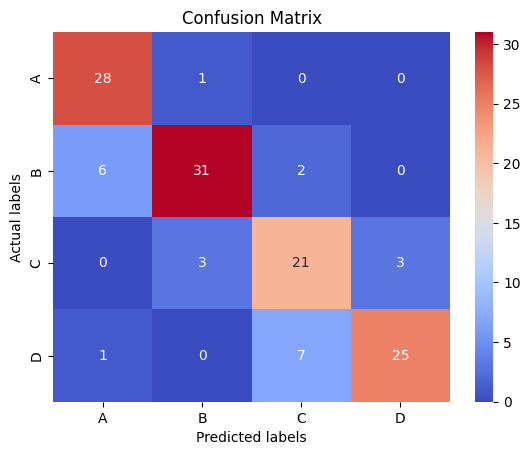

In [ ]:
# Show confusion matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a subplot
ax = plt.subplot()

# Display the confusion matrix as a heatmap with annotations
sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm")

# Set the title and axis labels
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted labels")
ax.set_ylabel("Actual labels")

# Set tick labels for both axes using class names
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

# Show the plot
plt.show()

In [ ]:
# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print(report)

              precision    recall  f1-score   support

           A     0.8000    0.9655    0.8750        29
           B     0.8857    0.7949    0.8378        39
           C     0.7000    0.7778    0.7368        27
           D     0.8929    0.7576    0.8197        33

    accuracy                         0.8203       128
   macro avg     0.8196    0.8239    0.8173       128
weighted avg     0.8290    0.8203    0.8203       128

